# AML-
Final Assessment 

Team Members
- Raj Kumar Phagami
- Kshitiz Bhattarai
- Yug Dev Bhandari

Todos: 
- Hypothesis testing on Twitter Covid 19 data to predict if there will be outbreak or not

### Import libraries

In [4]:
#import all the libraries here
import re
import json

import gzip
import time

import string
import datetime
import numpy as np 
import pandas as pd

import tweepy as tp

from tqdm import tqdm
from pathlib import Path
from geopy.geocoders import Nominatim

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
import json
import datetime as dt

# datetime.datetime.strptime(datetime.datetime.now(), '%Y-%m-%d %H:%M:%S')

def save_tweets(filename,csv):
    all_tweets = []
    for line in open('tweets.json'):
        tweets = json.loads(line)
        

        for key, value in tweets.items():
            if key == 'data':
                for i in value:
                    single = {'tweet_id': i['id'], 'text': i['text'], 'created_at': dt.datetime.strftime(dt.datetime.strptime(i['created_at'],'%Y-%m-%dT%H:%M:%S.000Z'),"%Y-%m-%d")}
                    all_tweets.append(single)
    df = pd.DataFrame(all_tweets)
    df.to_csv('tweets.csv', index=False)

### Collecting data from twitter

API keys

In [5]:
CONSUMER_API_KEY = "rLXpG6M7k5Ko64n0gfEFCPvEw"
CONSUMER_API_KEY_SECRET = "QBUiDNGoOZBGj38ypvhSnzhFPxuwiYeOdHKOizb2zenQqVSkE9"
ACCESS_TOKEN = "2909912347-Jjauz8bkogAsS1G4yrskycEBp379lh2eTymmusT"
ACCESS_TOKEN_SECRET = "AUpazPFs5ypMxV4qQSg7dW1hc0S05Gj2fmKMAhf3hN1g2"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAAD2dAEAAAAAZWp2eQMuxBPh9EX9uzqIXcZwu9w%3DdEJeiPbNNMLMQ1bMabYdfTqPTIptmfmrdNkGLaQRyILXbxEqgQ"

Authentication

In [6]:
from tweepy.auth import OAuthHandler
#create authentication object
auth_handler = tp.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_KEY_SECRET)
#set access token and secret to the auth object
auth_handler.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

#create API object passing an authentication object
tweet_api = tp.API(auth_handler,wait_on_rate_limit=True)

In [7]:
data_dirs = ['2020-05','2020-06','2022-05','2022-06']

In [30]:
#for 
def get_tweet_ids(data_dirs):
    tweet_ids = []
    for data_dir in data_dirs:
            for path in Path(data_dir).iterdir():
                if path.name.endswith('.txt'):
                    df = pd.read_csv(path,header=None,low_memory=False)
                    tweet_ids.extend(df[0].tolist())
                    # print(type(df[0].to_list()))
                    
    return tweet_ids
                

In [31]:
def get_random_ids(tweet_ids_20):
    random_ids = np.random.choice(tweet_ids_20, size=50000, replace=False)
    return random_ids


### Getting the tweet ids of 2020 months 5 and 6

In [ ]:
tweet_ids_20 = get_tweet_ids(data_dirs[:2])   

In [ ]:
random_ids = get_random_ids(tweet_ids_20)

In [46]:
df = pd.DataFrame(random_ids,columns=['tweet_id'])
df.to_csv('tweet_ids_2020.csv', index=False)

### Getting the tweets ids of 2022 months 5 and 6

In [6]:
tweet_ids_22= get_tweet_ids(data_dirs[2:])


In [9]:
random_ids = get_random_ids(tweet_ids_22)


In [10]:
df = pd.DataFrame(random_ids,columns=['tweet_id'])
df.to_csv('tweet_ids_2022.csv', index=False)

### Getting tweets according to tweet ids  in 2020

In [8]:
df_2020 = pd.read_csv('tweet_ids_2020.csv')
df_2020.head()

,tweet_id
0,1269879295297675264
1,1277227970839674881
2,1275788251949862917
3,1257957950750101506
4,1277260787225112577


In [9]:
app = Nominatim(user_agent="tutorial")
def get_location_by_address(address):
    """This function returns a location as raw from an address
    will repeat until success"""
    time.sleep(1)
    try:
        return app.geocode(address).raw
    except:
        return get_location_by_address(address)

In [13]:
def get_tweets(tweet_ids):
    tweets = []
    
    for tweet_id in tweet_ids:
        try:
            tweet = tweet_api.get_status(tweet_id)
            created_at = datetime.datetime.strftime(tweet.created_at,"%Y-%m-%d")
              
            single = {'tweet_id': tweet.id, 'text': tweet.text,'location':tweet.user.location, 'created_at': created_at}
#                         'lat': location['lat'],
#                         'lon': location['lon']}
        
            tweets.append(single)
        except:
            pass
    
    return tweets

In [ ]:
tweets_2020 = get_tweets(df_2020['tweet_id'])
len(tweets_2020)

es
pt
en
en
en
en
en
en
en
en
it
fr
en
en
en
en
en
en
en
en
pt
en
en
en
en
en
en
en
th
en
it
es
en
en
ja
en
ta
es
en
en
en
pt
it
pt
en
es
es
en
en
en
en
ja
en
en
zxx
en
en
tl
en
en
zxx
pt
de
en
ta
en
en
en
en
en
es
en
pt
en
en
pt
en
en
pt
es
en
es
en
pt
en
en
en
es
es
es
en
en
es
en
es
art
en
en
en
en
en
en
en
es
fr
es
en
en
en
es
hi
en
hi
en
en
en
pt
es
zxx
es
es
en
en
en
en
sv
hi
en
en
pt
en
en
es
qme
ca
es
en
en
fr
en
en
es
fr
pt
es
en
es
en
es
pt
en
en
en
en
de
en
en
es
en
es
es
en
en
es
es
en
es
en
qme
es
en
en
en
en
en
en
en
en
in
es
en
en
en
en
en
en
en
en
und
en
en
es
de
en
es
en
es
en
en
de
pt
en
en
it
en
en
en
pt
es
es
en
es
en
es
en
en
en
es
en
en
en
fr
en
en
en
en
qam
en
en
en
hi
tl
en
zxx
en
es
en
en
it
es
en
en
hi
en
es
ja
fr
hi
es
es
en
en
es
en
in
hi
en
en
en
en
en
en
en
en
es
en
en
de
en
ja
en
en
in
es
en
en
es
en
ru
en
tl
en
es
fr
en
it
es
fr
en
fr
en
en
en
es
en
en
en
en
es
en
es
art
en
en
es
en
es
pt
en
es
en
en
es
en
en
en
en
en
en
en
es
en
ca
pt
en
fr
en
en
es
en


Rate limit reached. Sleeping for: 694


de
es
en
en
in
en
en
es
en
en
en
en
en
es
en
en
en
es
en
tl
de
en
pt
en
es
en
fr
es
en
es
tl
en
zxx
es
en
en
en
en
es
en
en
es
en
en
fr
es
en
es
en
pt
en
en
en
es
en
in
en
en
es
en
hi
fr
en
en
fr
en
en
en
en
en
es
en
en
fi
es
en
en
pt
en
en
en
en
en
en
es
en
en
en
es
el
en
pt
es
en
th
en
en
en
en
en
en
en
en
en
en
en
hi
en
es
en
en
en
es
hi
en
und
en
en
es
en
en
pt
en
es
es
qme
en
en
en
en
en
en
en
ja
qme
en
es
en
en
en
en
en
ta
en
de
en
hi
sv
en
en
en
en
en
en
en
pt
en
en
pt
en
es
ja
th
en
en
it
en
en
in
fr
in
en
en
en
en
in
de
en
pt
en
es
pt
en
es
en
en
en
ja
fi
en
en
en
en
en
ca
en
es
en
es
en
en
es
en
en
es
en
es
en
en
en
es
en
en
en
en
en
en
en
es
in
en
hi
en
es
en
en
de
en
en
en
en
en
en
en
en
en
es
en
en
es
in
en
und
es
en
en
en
nl
en
es
en
in
en
en
en
en
en
es
en
en
it
es
en
pt
en
es
es
en
en
en
en
pt
en
en
en
en
en
fr
en
es
en
in
es
en
en
en
en
en
qht
es
hi
en
en
en
tr
en
in
it
en
en
in
en
en
en
en
en
tl
tl
en
en
tr
es
en
en
es
en
en
en
ta
en
es
en
es
en
qme
en
es
ca
en
qme
fr

Rate limit reached. Sleeping for: 717


en
en
en
ta
pt
en
en
en
es
ne
en
pt
qme
es
art
en
en
sv
en
en
en
ja
es
ca
tr
en
en
en
en
en
en
en
en
es
es
en
in
en
en
en
en
en
en
en
en
es
en
pt
en
en
it
ja
en
en
en
en
en
ht
en
ja
fr
en
es
en
en
en
qme
es
en
en
qst
pt
en
en
pt
en
en
en
de
ja
en
es
en
en
tr
en
es
en
fr
en
en
ru
en
es
en
ja
en
en
es
en
fr
en
th
en
en
en
pt
en
es
es
tl
en
en
en
en
en
en
es
en
en
en
en
hi
en
en
en
en
en
en
en
tr
es
en
art
en
en
en
es
en
en
in
en
en
es
en
en
en
nl
en
qht
en
en
en
en
es
es
en
en
en
ja
und
es
en
en
en
pt
en
in
en
en
in
en
en
en
fr
en
in
en
en
nl
en
en
en
es
en
es
en
en
it
es
en
en
en
en
tr
zxx
en
en
en
en
en
es
ja
en
en
en
en
en
en
en
en
en
en
ur
en
en
en
en
en
qht
en
en
es
en
en
en
en
en
en
hi
en
en
es
en
en
es
en
pt
pt
en
qme
ht
en
en
en
en
en
in
en
es
en
en
mr
ur
en
en
in
ja
en
en
en
es
en
es
es
fr
es
en
es
en
mr
en
en
hi
en
en
it
es
es
en
hi
es
en
en
en
en
en
en
en
in
tl
en
in
ja
en
en
en
en
en
en
ca
en
en
hi
en
en
es
en
tr
en
pl
es
en
en
en
en
en
es
in
ja
en
en
hi
ht
pt
en
ja
en
en
en


Rate limit reached. Sleeping for: 721


in
fr
es
en
fr
qme
en
en
en
en
pt
hi
qht
en
en
en
en
in
en
tr
en
en
en
en
en
en
en
en
en
en
en
es
en
en
pt
pt
es
es
es
en
en
en
es
en
es
es
en
en
en
en
en
en
en
qme
en
en
it
en
en
en
en
en
ja
en
en
ca
en
es
es
en
en
in
en
pt
fr
en
en
es
en
no
en
en
nl
tl
en
es
en
en
en
en
es
es
en
en
en
en
in
en
es
en
en
en
es
en
en
en
en
en
en
en
tr
en
es
en
en
en
en
ja
en
qme
en
en
en
en
es
en
en
es
es
en
en
en
en
es
en
en
en
en
en
en
en
en
es
en
en
en
en
en
en
en
en
en
en
en
en
en
pt
en
und
es
en
en
nl
en
en
en
es
en
en
en
en
en
en
en
en
pt
es
es
en
en
en
en
en
es
tr
en
en
en
en
en
en
en
it
es
en
en
pt
es
es
en
en
en
en
en
en
en
ja
ht
en
en
hi
en
en
en
en
en
en
en
en
es
en
es
en
en
en
en
en
pt
en
en
nl
en
hi
en
en
en
en
hi
en
es
th
ja
en
en
in
es
sv
en
en
en
en
en
en
en
en
pt
en
en
en
en
en
en
es
en
en
en
nl
en
en
en
en
en
en
en
en
en
en
en
en
en
ru
en
en
es
en
en
ca
en
en
es
tl
en
en
in
en
en
en
en
en
en
en
en
en
pt
en
en
in
es
en
en
en
en
en
en
en
en
en
hi
en
en
it
en
es
fr
in
es
en
es
es
en
en
en

Rate limit reached. Sleeping for: 718


en


In [ ]:
df_20220 = pd.DataFrame(tweets_2020)
df_20220.to_csv('tweets_2020.csv', index=False)

In [ ]:
def get_tweets():
    tweets = 

In [ ]:
df_2022 = pd.read_csv('tweet_ids_2022.csv')
df_2022.head()

In [ ]:
tweets_2022 = get_tweets(df_2022['tweet_id'][:20000])
len(tweets_2020)

In [ ]:
df_2022 = pd.DataFrame(tweets_2020)
df_2022.to_csv('tweets_2020.csv', index=False)

Fetch tweets according to the keywords

In [4]:
#finding the date of a week ago from the current date in the format "%Y-%m-%d"
current_date = datetime.datetime.now() #week end
num_of_days_ago = datetime.timedelta(days = 7)
week_start = current_date - num_of_days_ago # a week before
week_start = week_start.strftime("%Y-%m-%d")
current_date = current_date.strftime("%Y-%m-%d")
current_date, week_start

('2022-08-04', '2022-07-28')

In [5]:
client = tp.Client(bearer_token=BEARER_TOKEN)

In [14]:
query = 'virus'

tweets = client.search_all_tweets(query=query)

for tweet in tweets.data:
    print(tweet.text)
    
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)
        break

Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

In [8]:
tweets = client.search_all_tweets(query="#DonaldTrump")



Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

In [6]:
# defining the function which returns the cursor of the tweepy which holds the results of the query.
def get_tweets(keyword,week_start,current_date):
  return tp.Cursor(tweet_api.search,
                   q=keyword,
                   lang="en",
                   result_type="recent"
                   ).items(100)

In [7]:
#Fetch data from the twitter api ( id, created_at, user_id, text)
keywords = ["diseases","flu","virus","health","symptoms","medicine"]

#storing keywords and their respective tweets in a dictionary
searched_tweets={}

# tweet_api.search_tweets(keywords)
tweets=[]
for i in tp.Cursor(tweet_api.search_tweets,
                  q="virus",
                  lang="en",
                  ).items(1):
  print(i.text)
  break
  # tweet = {"id":i.id,"tweet_time":i.created_at.strftime("%Y-%m-%d"),"user_id":i.user.id,"text":i.text}
  # tweets.append(tweet)
# searched_tweets[keyword]=tweets


RT @SecBecerra: In light of evolving circumstances on the ground, I am declaring a public health emergency on #monkeypox. We are prepared t…


In [ ]:
tweets_search = {}
for keyword in keywords:
  
  # results = get_tweets(keyword,'2022-07-02','2022-07-09')
  tweets=[]
  for i in tp.Cursor(tweet_api.search,
                   q=keyword,
                   lang="en",
                   since=week_start,
                   until=current_date,
                   count=25).items(500):
    tweet = {"id":i.id,"tweet_time":i.created_at.strftime("%Y-%m-%d"),"user_id":i.user.id,"text":i.text}
    tweets.append(tweet)
  tweets_search[keyword]=tweets

In [ ]:
tweets_search

### Saving the data

In [ ]:
# save the all the data to csv format with respect to the search keywords
for keyword, tweets in tweets_search.items():
  
  df = pd.DataFrame(tweets)
  df.to_csv(keyword+".csv")

### Data Cleaning (Preprocessing)
Todos:
- Remove duplication
- Remove Punctuation
- Remove numbers
- Remove words with length less than 2


In [ ]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Defining functions

In [ ]:
from nltk.tokenize import word_tokenize
#user-defined functions
def tokenize(text):
  return word_tokenize(text)

def stemming(text):
  pstemmer = PorterStemmer()
  return pstemmer.stem(text)

def remove_emojies(text):
    return text.encode('latin-1','ignore').decode('latin-1')
remove_emojies(str("Hi, Test Emoji  😜 Test"))

def remove_urls(text):
  urlPattern = re.compile(r'https?://\S+|www\.\S+')
  return urlPattern.sub(r'', text) 


#Function to preprocess
def preprocessing(df):
  #lowering all the text
  df['text'] = df['text'].str.lower()

  #Remove punctuations
  df['text'] = df['text'].str.replace('[^\w\s]','')

  #Remove stopwords 
  StopWords = stopwords.words("english")
  df['text'] = df['text'].apply(lambda a: " ".join([token for token in a.split() if token not in StopWords]))
  
  #Remove numbers
  df['text'] = df['text'].str.replace('\d+', '')

  #Removing emojis
  df['text'] = df['text'].apply(remove_emojies)

  #removing URLS
  df['text'] = df['text'].apply(remove_urls)

  #removing most common words
  freq_dist = FreqDist()

  for token in df['text'].values:
    for word in token.split():
      freq_dist[word] += 1
  freq = set([w for (w, wc) in freq_dist.most_common(10)])

  df['text'] = df['text'].apply(lambda a: " ".join([token for token in a.split() if token not in freq]))
  
  #TOKENIZATION 
  df['text'] = df['text'].apply(word_tokenize)

  #stemming and lemmmatizing
  df['text'] = df['text'].apply(lambda a: [stemming(token) for token in a])

  lemmatizer = WordNetLemmatizer()
  df['text'] = df['text'].apply(lambda a: " ".join([lemmatizer.lemmatize(token) for token in a]))


In [ ]:
## Preprocessing all the text data 
#saving dataframes in dictionary form with respect to the keywords defined in the assignment
tweet_dfs = {}
l = ''
for key,value in tweets_search.items():
  df = pd.DataFrame(value)
  
  ## call preprocessing function
  preprocessing(df)
  tweet_dfs[key]=df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#list of dataframes
tweet_dfs.keys(), tweet_dfs.values()

### Visualizing and Clustering

### visualization

- Visualize by date
  
  - pandas.groupby(date).plot()
- Visualize user_id
  - pandas.groupby(user_id).plot()

  https://www.statology.org/pandas-groupby-plot/#:~:text=You%20can%20use%20the%20following%20methods%20to%20perform,and%20display%20sales%20as%20line%20chart%20df.groupby%28%27product%27%29%20%5B%27sales%27%5D.plot%28legend%3DTrue%29

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

#Reduce dimensions to 3 from original 7; and then try to plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,7)

In [ ]:
tweet_dfs['APPL']

,id,tweet_time,user_id,text
0,1545556494711771136,2022-07-08,748961346214043648,kurapikil nomoremikrotit kdjjfnkfkkfkg ted las...
1,1545556465938726926,2022-07-08,427264265,garb export servicefdi bypass fcra edcbi scannin
2,1545550512279281664,2022-07-08,626243147,kid cudi essenti playlist head as
3,1545549764732895232,2022-07-08,1264665712058085377,bearish msft goog tsla amzn friday via rwallst...
4,1545542541537329153,2022-07-08,1136370591517290496,starttradingtwo member week scratch arent anot...
...,...,...,...,...
495,1544833279857156096,2022-07-06,977974182611996674,jbriandavi newsasset dont forget
496,1544831119555792896,2022-07-06,1355243838135263234,starttradingtwo etoro found whop day trader lo...
497,1544827585091231745,2022-07-06,1172948594627772416,nautica voyag eau de toilett men fresh romant ...
498,1544821092694515713,2022-07-06,1301084953489428488,starttradingtwo etoro found whop day trader lo...


In [ ]:
from datetime import datetime 
from matplotlib.pyplot import plt

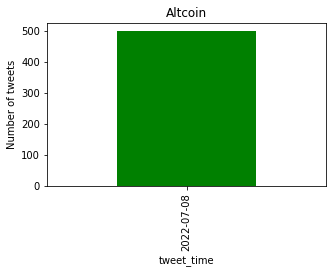

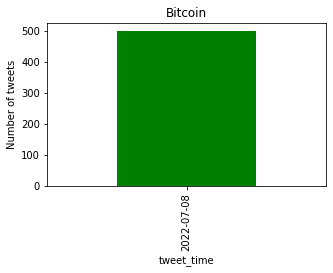

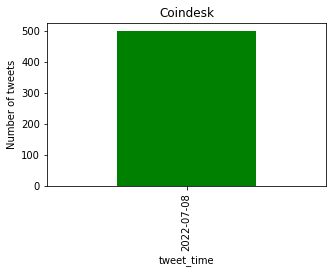

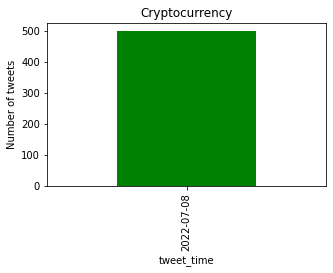

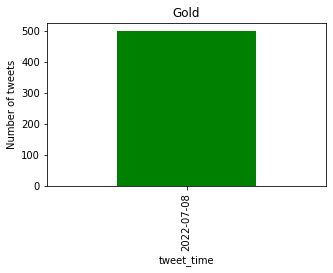

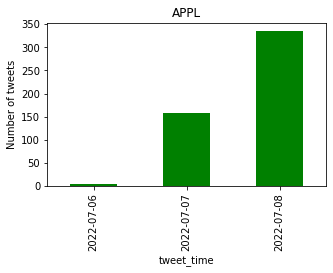

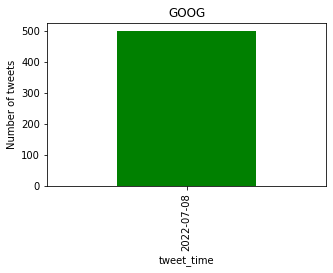

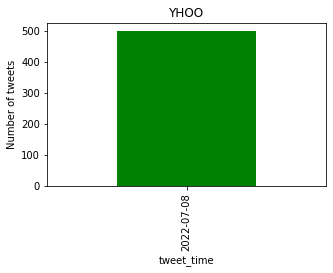

In [ ]:
for k, v in tweet_dfs.items():
  df = pd.DataFrame(tweet_dfs[k])
  tmp_df = df.groupby(df['tweet_time'])['text'].count()
  tmp_df.plot(kind='bar', color='green', figsize=(5,3))
  plt.title(k)
  plt.xlabel('tweet_time')
  plt.ylabel('Number of tweets')
  plt.show()

  



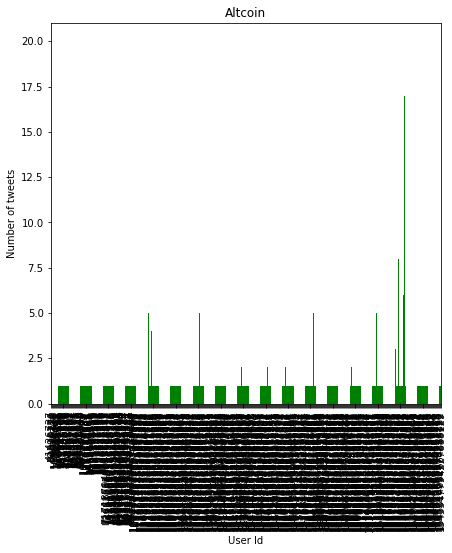

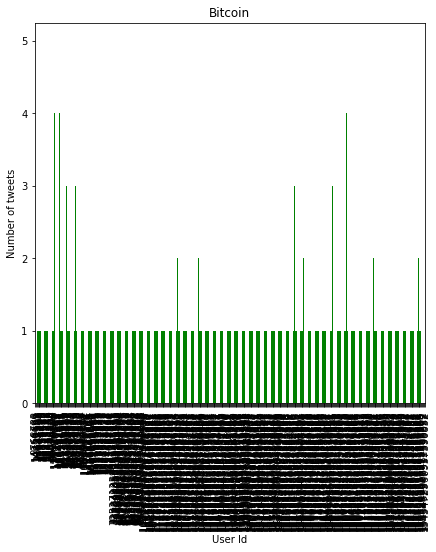

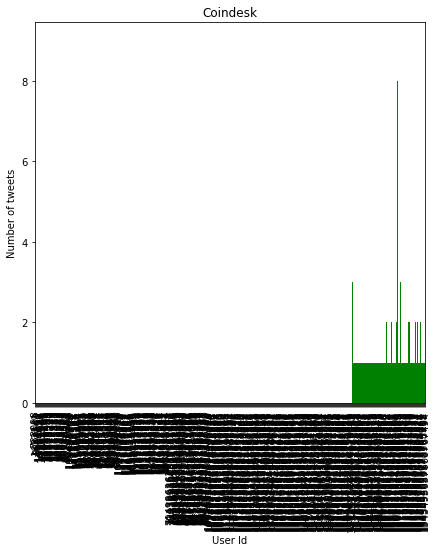

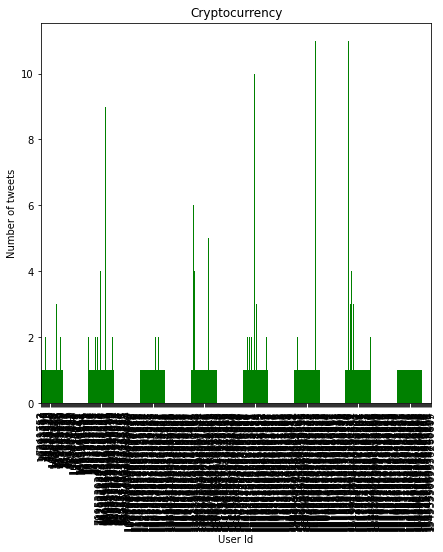

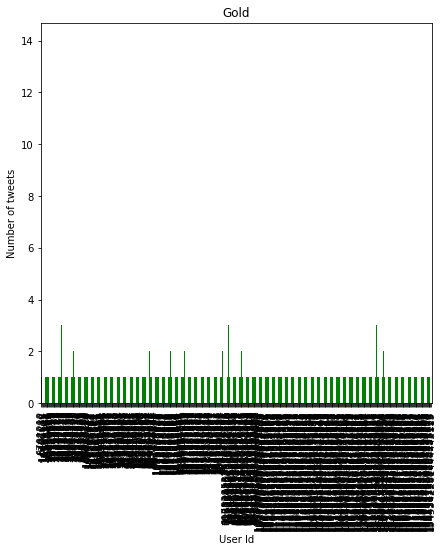

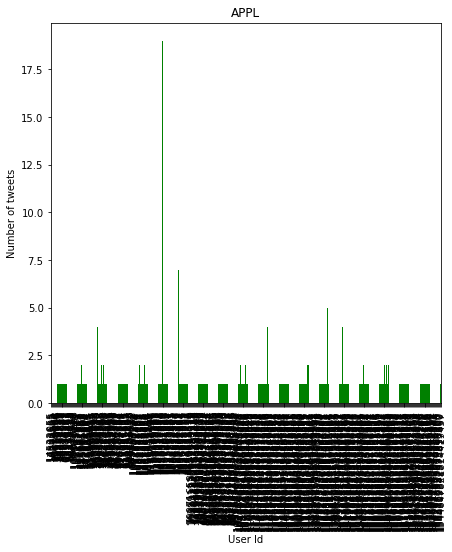

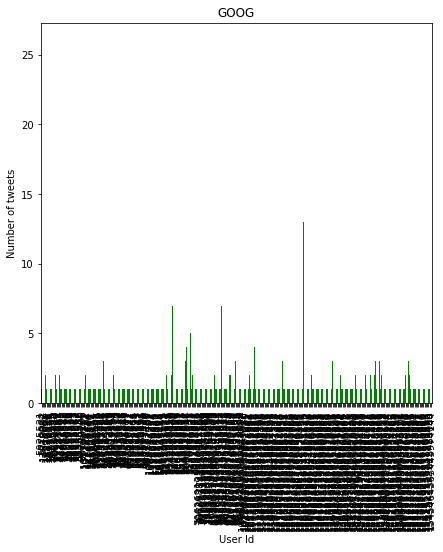

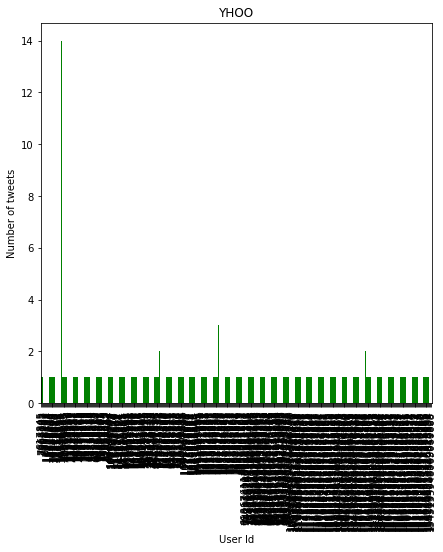

In [ ]:
for k, v in tweet_dfs.items():
  df = pd.DataFrame(tweet_dfs[k])
  tmp_df = df.groupby(df['user_id'])['text'].count()
  tmp_df.plot(kind='bar', color='green', figsize=(7,7))
  plt.title(k)
  plt.xlabel('User Id')
  plt.ylabel('Number of tweets')
  plt.show()

visualizing keywords with their number of tweets

In [ ]:
tweet_nums = {}
for k,v in tweet_dfs.items():
  tweet_nums[k]=len(v)

NameError: ignored

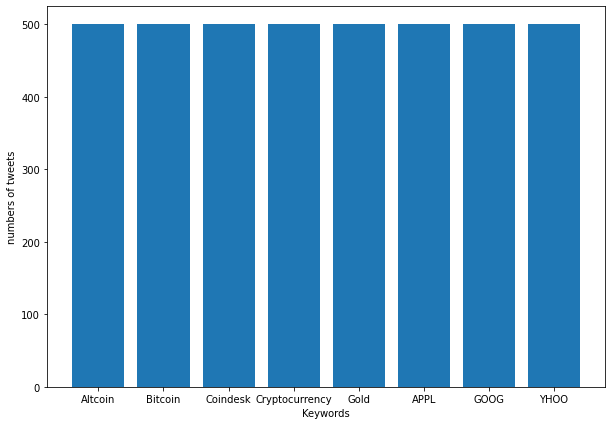

In [ ]:
fig = plt.figure()
plt.bar(list(tweet_nums.keys()),list(tweet_nums.values()))
plt.xlabel("Keywords")
plt.ylabel("numbers of tweets")
plt.show()

### Clustering 

clustering all the documents and visualizing it in a graph

In [ ]:
#get cosine_similar
def get_cosign_sim(recieved_vector):
    return cosine_similarity(recieved_vector)

For all the documents after merging

In [ ]:
# do clustering according to the feasibilty of dataset
#Get vectors of each documents
#use k means clustering if possible 
#merge all the dataframes
all_texts=pd.concat(tweet_dfs.values())
all_texts.head()

tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(all_texts['text']).toarray()
vectors


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pca = PCA(n_components=2)
cos_sim_pca = pca.fit_transform(vectors)
cos_sim_pca


array([[-0.05710718, -0.03952874],
       [ 0.94251332,  0.05058006],
       [-0.05539771, -0.0375877 ],
       ...,
       [-0.05168595, -0.03363116],
       [-0.05102241, -0.03304711],
       [-0.05193114, -0.03388114]])

In [ ]:
pca.explained_variance_ratio_

array([0.05337089, 0.0345719 ])

In [ ]:
cos_sim_pca[0,0]

-0.05710722364887195

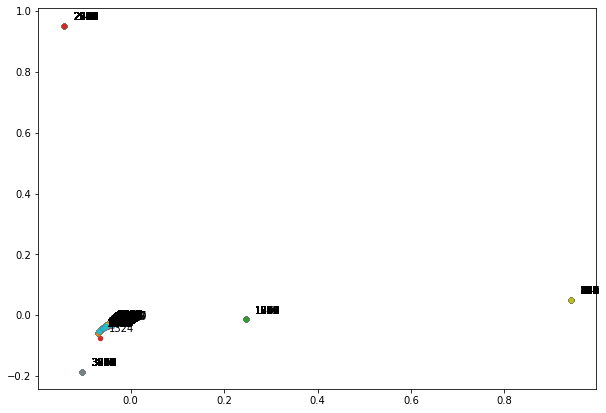

In [ ]:
n = cos_sim_pca.shape[0]

for i in range(n):
    x = cos_sim_pca[i,0]
    y = cos_sim_pca[i,1]
    label = str(i+1)
    plt.scatter(x,y,s=20)
    plt.text(x+0.02,y+0.02, label)
# plt.legend()   


clustering K Means


In [ ]:
kmeans = KMeans(n_clusters =5, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)

In [ ]:
labels = keywords
colors = ['r','g','c','y','brown']

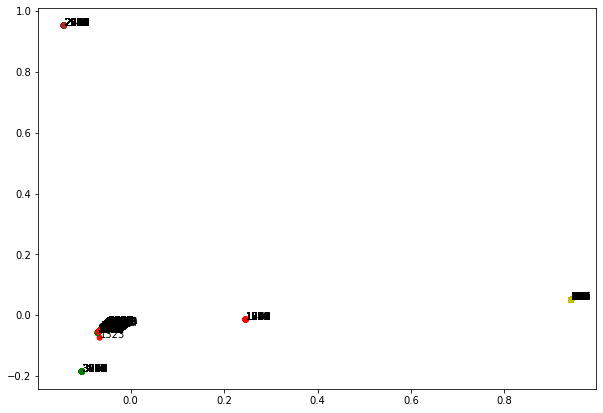

In [ ]:
x = [o[0] for o in cos_sim_pca]
y = [o[1] for o in cos_sim_pca]
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, y,s=25, c=[colors[d] for d in kmean_indices])
# ax.plot(x,y)

for i, txt in enumerate(all_texts['text']):
    ax.annotate(str(i), (x[i], y[i]))
plt.show()


### Conclusion
Describe insights and results 